# **Predicción de la puntuación de Apgar** 

## 1. Introducción : 

En este proyecto abordaremos datos sobre el estudio y el cálculo de la puntuación de Apgar en infantes recién nacidos.

El exámen de Apgar es el primer diagnóstico que se realiza a un recién nacido, en distintos periodos de tiempo. La primera y la segunda observación se realizan un minuto y cinco minutos posteriores al nacimiento del feto. Mediante este examen, se determina de la manera más rápida el estado físico y salud general del recién nacido como también si es que requiere de alguna intervención posterior al nacimiento.

Para lograr de manera exitosa una predicción de esta puntuación, se obtiene un dataset con los antecedentes socioeconómicos de ambos padres del infante, por lo que se busca alguna correlación entre las actividades diarias y malas prácticas de los padres frente a su descendencia.

A partir de las metodologías vistas en clases, se busca generar estadísticas y correlaciones relevantes a las costumbres pecaminosas de la sociedad y nuestra futura generación. De esta forma, abordaremos una postura crítica y disuasiva, con una finalidad de generar el cambio necesario para cuidar y preservar nuestro futuro.

La segunda postura frente a este trabajo es dar un mayor lapso temporal a los potencialmente padres. Esto quiere decir, a partir de nuestro trabajo se podrá identificar problemáticas en algún recién nacido, sin si quiera tener la etapa del embarazo completa. De manera más clara, conociendo los datos socioeconómicos, tales como ingreso, estrato social, estudios, escolaridad, empleo, hogar geográfico, por mencionar algunos, se llegará a una noción del estado de salud de una futura guagua.

La problemática que se presenta en un inicio es la incertidumbre de la generalización de nuestras predicciones acerca del examen de Apgar. Si bien, se logrará predecir esta puntuación en base a numerosos factores, ¿qué tan generalizable es la salud de un recién nacido? ¿Se puede concluir al respecto de su vida completa? O ¿sólo es una advertencia al momento de dar a luz? ¿Se podrán tomar decisiones como por ejemplo, no tener un bebé porque existe conocimiento que nacerá con algún defecto? Siendo esta la gran problemática, nos enfocaremos en estudiar relaciones del estado de salud inicial de un bebé con los aspectos socio-económicos de los padres, para posteriormente relacionar la puntuación de Apgar con la calidad de vida de una persona.


## 2. Descripción de los datos :   
        
        

 Atributos con los que trabajaremos:
        * OCNTYPOP: Población del sector geográfico de la persona en medición.
        * BFacil3: Institución en donde se dio el parto.*
                   Posibles valores: Hospital, ~Hospital, No se sabe.
        * Mager14: Escala de edad de la madre en intervalos pequeños.
        * Mager9: Escala de edad de la madre en intervalos generales.
        * MRACEHISP: Raza de la madre según origen Hispáno.
                    Algunos valores: Mexicana, Puerto Riqueña, Cubana, América del centro/sur
        * MAR: Estatus de matrimonio. Valores: Sí, No, No se sabe.
        *MEDUC: Escolaridad de la madre.
        *CIG_REC: Dato que representa si la madre fuma o no.
        *APGAR5: Puntuación Apgar del recién nacido. Este es el valor que deseamos predecir.
        *Sex: Género del recién nacido.


## 3.Exploración inicial:

In [1]:
    import pandas as pd
    df2=pd.read_csv("nchs_birth_2011.csv")
    cnt = df2.count()
    print (cnt)

/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


FILLER1           41130
REVISION          41130
FILLER2           41130
DOB_YY            41130
DOB_MM            41130
FILLER3           41130
DOB_WK            41130
OTERR             41130
FILLER4           41130
OCNTY             41130
OCNTYPOP          41130
BFACIL            41130
UBFACIL           41130
FILLER5           41130
BFACIL3           41130
FILLER6           41130
MAGE_IMPFLG       41130
MAGE_REPFLG       41130
MAGER             41130
MAGER14           41130
MAGER9            41130
MBCNTRY           41130
FILLER7           41130
MRTERR            41130
FILLER8           41130
MRCNTY            41130
FILLER9           41130
RCNTY_POP         41130
FILLER10          41130
RECTYPE           41130
                  ...  
F_URF_ECLAMP      41130
FILLER70          41130
F_UOB_INDUCT      41130
FILLER71          41130
F_UOB_TOCOL       41130
FILLER72          41130
F_ULD_MECONIUM    41130
FILLER73          41130
F_ULD_PRECIP      41130
FILLER74          41130
F_ULD_BREECH    

Como se puede observar el dataset contiene 314 atributos y 41130 tuplas. Se redimensionó quitando los atributos que no serían importantes para nuestro estudio como ser los datos del bebé al nacer(peso, largo, dimensiones físicas) ya que la idea del proyecto es predecir el estado del bebé con los datos de los padres; y en ese momento no es posible saber más información del bebé.

Además este dataset contaba con la peculiaridad de que varios atributos como ser la edad, el estrato social, nivel de escolaridad, entre otros, aparecían en la tabla con diferentes escalas, por ejemplo:

	El campo MAGER es la edad de la madre como tal, pero además está el campo MAGER9 que  también es la edad de la mamá  solo que están agrupadas en 9 clases (menos 15 años,15-19 años,20-24 años, …) , igual está MAGER14 (edad de la madre en 14 clases) por lo que sólo se considera uno de estos campos, ya que son el mismo atributo en un escalado diferente. 

In [2]:
    import pandas as pd
    df1=pd.read_csv("reduccion.csv")
    cnt = df1.count()
    print("Campos Finales")
    print (cnt)

Campos Finales
OCNTY        41130
OCNTYPOP     41130
BFACIL3      41130
MAGER14      41130
MAGER9       41130
MRACEHISP    41130
MAR          41130
MEDUC        41130
CIG_REC      41130
APGAR5       41130
APGAR5R      41130
SEX          41130
dtype: int64


## 4.Estadísticas y Gráficos:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df1[(df1['APGAR5'] != 99)].groupby('MEDUC').plot.bar()
plt.show()

Gráfico que muestra la relación entre la escolaridad de la madre y la medida del examen APGAR del bebé. Podemos observar a mayor escolaridad, más saludable nacen los bebés.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df1[(df1['APGAR5'] != 99)].groupby('MAGER9').mean().loc[:,['APGAR5']].plot()
plt.show()

Gráfico que muestra que entre los 15 a 34 años de edad de la madre, aumenta la puntuación de Apgar, sin embargo en el intervalo de 35 a 44 años, la puntuación disminuye considerablemente y  finalmente retoma en el intervalo 45 a 50 años. 

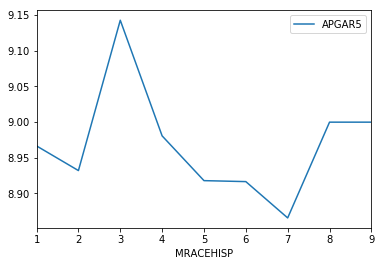

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df1[(df1['APGAR5'] != 99)].groupby('MRACEHISP').mean().loc[:,['APGAR5']].plot()
plt.show()

Gráfico que muestra que las madres cubanas son las que dieron a luz a los bebes más saludables, y que las madres no hispanas negras son las tienen la peor calificación. 

## 5.Trabajos Relacionados:


### Objetivo

Evaluar si la puntuación de Apgar sigue siendo pertinente en la práctica contemporánea después de más de 50 años de amplio uso y evaluar el valor de la puntuación de Apgar en la predicción de la supervivencia infantil, expandiéndose desde el período neonatal hasta el post-neonatal.

### Métodos

Se utilizó el conjunto de datos sobre nacimientos vivos y mortalidad infantil, que incluía 25.168.052 nacimientos únicos y 768.305 partos gemelos. El resultado del interés fue la muerte del bebé dentro de un año después del nacimiento. Se utilizó el modelo de riesgo proporcional de Cox para estimar la razón de riesgo de mortalidad infantil con diferentes puntuaciones de Apgar.

### Resultados

Entre los nacimientos con una puntuación de Apgar muy baja a los cinco minutos (1-3), las tasas de mortalidad neonatal y post neonatal permanecieron altas hasta el término (≥ 37 semanas). Por otro lado, entre los nacimientos con alto puntaje de Apgar (≥7), la tasa de mortalidad neonatal y post neonatal disminuyó progresivamente con la edad gestacional. Los blancos no hispanos tuvieron una mortalidad neonatal consistentemente mayor que la de los no hispanos negros tanto en nacimientos prematuros como de término. Sin embargo, para la mortalidad post-neonatal, el negro tenía una tasa significativamente mayor que el blanco. El patrón de los cambios en la mortalidad neonatal y post-neonatal por puntuación de Apgar en nacimientos gemelos es esencialmente el mismo que en los nacimientos únicos.

### Conclusiones

El sistema de puntuación de Apgar tiene un valor continuo para predecir los resultados adversos neonatales y posneonatales tanto en el término como en los prematuros, y es aplicable a gemelos y en varios grupos raciales o étnicos.


referencia: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3726736/

# Metodos de Clasificación:


## 1. Árbol de decisión

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import pandas as pd

df1=pd.read_csv("reduccion.csv")

X= df1.drop(labels=["APGAR5","APGAR5R","CIG_REC","SEX"],axis=1)
Y= df1.APGAR5
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test,y_pred))


Accuracy en test set: 0.882266263906
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00         6
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        36
          7       0.00      0.00      0.00       152
          8       0.08      0.01      0.02       645
          9       0.89      0.99      0.94     12045
         10       0.31      0.01      0.02       502
         99       0.81      0.11      0.19       122

avg / total       0.81      0.88      0.84     13573

[[    0     0     0     0     0     0     0     0     9     0     0]
 [    0     0     0     0     0     0     0     0     6     0     0]
 [    0     0     0     0     0     0     0     0     6     0     0]
 [    0     0     0     0     0     0     0     0    14     0   

/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Como es de esperarse al tener los datos des balanceados el árbol de decisión tienen una precisión muy buena, pero es claro ya que la mayoría de los datos están en la clase 9.   

###  Dataset Con Clases Muy Desbalanceadas

In [3]:
df1['APGAR5'].value_counts()

9     36500
8      1955
10     1521
7       460
99      370
6       109
5       108
4        42
1        29
2        19
3        17
Name: APGAR5, dtype: int64

### Subsampling de APGAR =  9

In [4]:
import numpy as np

idx = np.random.choice(df1.loc[df1.APGAR5 == 9].index, size=30000, replace=False)
data_subsampled = df1.drop(df1.iloc[idx].index)
print(data_subsampled['APGAR5'].value_counts())

9     6500
8     1955
10    1521
7      460
99     370
6      109
5      108
4       42
1       29
2       19
3       17
Name: APGAR5, dtype: int64


### Árbol de decisión Con  Reducción

In [5]:


X= data_subsampled.drop(labels=["APGAR5","APGAR5R","CIG_REC","SEX"],axis=1)
Y= data_subsampled.APGAR5
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy en Árbol de Decisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test,y_pred))


Accuracy en Árbol de Decisión: 0.561938469916
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00         6
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        36
          7       0.15      0.03      0.04       152
          8       0.26      0.09      0.14       645
          9       0.59      0.92      0.72      2145
         10       0.33      0.04      0.07       502
         99       0.57      0.10      0.17       122

avg / total       0.46      0.56      0.46      3673

[[   0    0    0    0    0    0    0    0    9    0    0]
 [   0    0    0    0    0    0    0    1    5    0    0]
 [   0    0    0    0    0    0    0    1    5    0    0]
 [   0    0    0    0    0    0    0    2   12    0    0]
 [   0    0    0    0    0    

/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Como es de esperarse al tener los datos des balanceados el árbol de decisión tienen una precisión muy buena, pero es claro ya que la mayoría de los datos están en la clase 9.   

### Nivelando todos los Apgar a aproximadamente 10.000 tuplas

In [12]:
idx1 = np.random.choice(df1.loc[df1.APGAR5 == 1].index, size=1000)
idx2 = np.random.choice(df1.loc[df1.APGAR5 == 2].index, size=1000)
idx3 = np.random.choice(df1.loc[df1.APGAR5 == 3].index, size=1000)
idx4 = np.random.choice(df1.loc[df1.APGAR5 == 4].index, size=1000)
idx5 = np.random.choice(df1.loc[df1.APGAR5 == 5].index, size=1000)
idx6 = np.random.choice(df1.loc[df1.APGAR5 == 6].index, size=1000)
idx7 = np.random.choice(df1.loc[df1.APGAR5 == 7].index, size=1000)
idx8 = np.random.choice(df1.loc[df1.APGAR5 == 8].index, size=1000)
idx9 = np.random.choice(df1.loc[df1.APGAR5 == 9].index, size=26000, replace=False)
idx10 = np.random.choice(df1.loc[df1.APGAR5 == 10].index, size=1000)

data_subsampled = df1.drop(df1.iloc[idx9].index)
data_oversampled = pd.concat([data_subsampled, df1.iloc[idx1]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx2]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx3]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx4]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx5]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx6]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx7]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx8]])
data_oversampled = pd.concat([data_oversampled, df1.iloc[idx10]])
print(data_oversampled['APGAR5'].value_counts())

9     10500
8      2955
10     2521
7      1460
6      1109
5      1108
4      1042
1      1029
2      1019
3      1017
99      370
Name: APGAR5, dtype: int64


### Árbol de decisión Con Nivelación de Clases 

In [21]:
X = data_oversampled.drop(labels=["APGAR5","APGAR5R","CIG_REC","SEX"],axis=1)
Y = data_oversampled.APGAR5
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy en Árbol de Decisión NDC:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test,y_pred))

Accuracy en Árbol de Decisión NDC: 0.504960442044
             precision    recall  f1-score   support

          1       0.55      0.71      0.62       339
          2       0.63      0.32      0.42       336
          3       0.47      0.55      0.50       336
          4       0.50      0.45      0.47       344
          5       0.52      0.25      0.34       366
          6       0.55      0.40      0.46       366
          7       0.47      0.14      0.22       482
          8       0.33      0.09      0.14       975
          9       0.51      0.83      0.63      3465
         10       0.45      0.05      0.10       832
         99       0.68      0.11      0.18       122

avg / total       0.49      0.50      0.44      7963

[[ 242    0   11    0    0    0    0    0   86    0    0]
 [   0  107   14    0    0    0    0    0  215    0    0]
 [   0   24  185    0    0    0    0    0  127    0    0]
 [  24    0    0  154    0    0    0    0  166    0    0]
 [  12    8   12    8   93

Al nivelar las clases el clasificador ya tiene un comportamiento más o menos aceptable, ya la precisión se redujo, pero es claro que este estudió estamos haciendo que el clasificador  se aprenda el data-set. 

## 2. Redes Neuronales 

In [6]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

datos = pd.read_csv("reduccion.csv")
X = datos.drop(labels=["APGAR5","APGAR5R","CIG_REC", "SEX"],axis=1)
Y = datos.APGAR5

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy en Red Neuronal:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test, y_pred))

Accuracy en Red Neuronal: 0.888233993959
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00         6
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        36
          7       0.00      0.00      0.00       152
          8       0.00      0.00      0.00       645
          9       0.89      1.00      0.94     12045
         10       0.33      0.00      0.01       502
         99       1.00      0.11      0.19       122

avg / total       0.81      0.89      0.84     13573

[[    0     0     0     0     0     0     0     0     9     0     0]
 [    0     0     0     0     0     0     0     0     6     0     0]
 [    0     0     0     0     0     0     0     0     6     0     0]
 [    0     0     0     0     0     0     0     0    14     

/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Explicación redes neuronales
En general, las redes neuronales no brindan resultados buenos para datos en los cuales las clases están desbalanceadas. En nuestro caso, la clase de Apgar = 9 posee un 89% de los datos y los demás se dividen entre los Apgar >= 5, quedando una cantidad ínfima para los datos cercanos a 1. Dicho esto, podemos reflejar en los resultados previos: Se obtienen precision, recall y f1-score igual a 0 en todos los Apgar distinto de 9, es decir la red neuronal no logró predecir datos que sean distintos a este valor del apgar.

### Red Neuronal Con Nivelación de Clases

In [22]:

X = data_oversampled.drop(labels=["APGAR5","APGAR5R","CIG_REC","SEX"],axis=1)
Y = data_oversampled.APGAR5

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy en Redes Neuronales NDC:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test, y_pred))

Accuracy en Redes Neuronales NDC: 0.436895642346
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       339
          2       0.38      0.05      0.09       336
          3       0.00      0.00      0.00       336
          4       0.00      0.00      0.00       344
          5       0.00      0.00      0.00       366
          6       0.00      0.00      0.00       366
          7       0.00      0.00      0.00       482
          8       0.00      0.00      0.00       975
          9       0.44      1.00      0.61      3465
         10       0.00      0.00      0.00       832
         99       1.00      0.09      0.17       122

avg / total       0.22      0.44      0.27      7963

[[   0    0    0    0    0    0    0    0  339    0    0]
 [   0   18    0    0    0    0    0    0  318    0    0]
 [   0    0    0    0    0    0    0    0  336    0    0]
 [   0    0    0    0    0    0    0    0  344    0    0]
 [   0    0    0    0    0 

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ya revisando los resultados con la nivelación de las clases, podemos concluir que definitivamente redes neuronales no es un buen clasificador para este dataset. Se observa que la red no es capáz de aprender algún patrón que identifique la salud de un recién nacido en base a los datos sociales de la madre.

## 4.Support Vector Machines

In [17]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

datos = pd.read_csv("reduccion.csv")
X = datos.drop(labels=["APGAR5","APGAR5R","CIG_REC", "SEX"],axis=1)
Y = datos.APGAR5

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y)

clf = svm.SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test, y_pred))

Accuracy en test set: 0.888086642599
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00         6
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        36
          7       0.00      0.00      0.00       152
          8       0.00      0.00      0.00       645
          9       0.89      1.00      0.94     12045
         10       0.00      0.00      0.00       502
         99       1.00      0.07      0.14       122

avg / total       0.80      0.89      0.84     13573

[[    0     0     0     0     0     0     0     0     9     0     0]
 [    0     0     0     0     0     0     0     0     6     0     0]
 [    0     0     0     0     0     0     0     0     6     0     0]
 [    0     0     0     0     0     0     0     0    14     0   

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM Con Nivelación de Clases

In [16]:

X = data_oversampled.drop(labels=["APGAR5","APGAR5R","CIG_REC","SEX"], axis=1)
Y = data_oversampled.APGAR5

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y)

clf = svm.SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix (y_test, y_pred))

Accuracy en test set: 0.470300138139
             precision    recall  f1-score   support

          1       0.63      0.40      0.49       339
          2       0.77      0.20      0.31       336
          3       0.56      0.31      0.40       336
          4       0.67      0.11      0.19       344
          5       0.56      0.06      0.11       366
          6       0.47      0.04      0.07       366
          7       0.83      0.01      0.02       482
          8       0.22      0.03      0.05       975
          9       0.46      0.96      0.62      3465
         10       0.88      0.01      0.02       832
         99       0.93      0.11      0.19       122

avg / total       0.54      0.47      0.35      7963

[[ 137    0    0    0    0    0    0    0  202    0    0]
 [   0   66   19    0    0    0    0    0  251    0    0]
 [   0    0  103    0    0    0    0    0  233    0    0]
 [  18    0    0   39    0    0    0    0  287    0    0]
 [   0    3    5    0   22    0    0   